# Drug Consumption Final Project for COMP 562 - Random Forest Methods
#### by Priyanshi Aeron

## Import Libraries and Data

In [91]:
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


drug_labels = ['Alcohol','Amphet','Amyl','Benzos','Caff','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','VSA']
sched_1 = ['Heroin','LSD','Ecstasy','Mushrooms']
sched_2 = ['Amphet','Coke','Crack','Meth']
sched_3 = ['Ketamine']
sched_4 = ['Benzos']
not_controlled_substance = ['Alcohol','Amyl','Caff','Choc','Legalh','Nicotine','VSA']
schedules = ['Sch1','Sch2','Sch3','Sch4', 'SchNA']
personality_labels = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
demographic_labels = ['Age','Gender','Education','Country','Ethnicity']
target_label = ['Cannabis']

In [92]:
drugs = pd.read_csv('drugs.csv')
print(drugs.shape)
drugs.head()

(1877, 35)


Age  Gender                          Education Country  \
0  35-44       1  Professional certificate/ diploma      UK   
1  25-34       0                   Doctorate degree      UK   
2  35-44       0  Professional certificate/ diploma      UK   
3  18-24       1                     Masters degree      UK   
4  35-44       1                   Doctorate degree      UK   

           Ethnicity  Nscore  Escore  Oscore  Ascore  Cscore  ...  LSD  Meth  \
0  Mixed-White/Asian    39.0    36.0    42.0    37.0    42.0  ...    0     0   
1              White    29.0    52.0    55.0    48.0    41.0  ...    1     1   
2              White    31.0    45.0    40.0    32.0    34.0  ...    0     0   
3              White    34.0    34.0    46.0    47.0    46.0  ...    0     0   
4              White    43.0    28.0    43.0    41.0    50.0  ...    0     0   

   Mushrooms  Nicotine  VSA  Sch1  Sch2 Sch3  Sch4  SchNA  
0          0         1    0     0     1    0     1      1  
1          0         1    0     1     1    1     0      1  
2          1         0    0     1     0    0     0      1  
3          0         1    0     0     1    1     1      1  
4          1         1    0     1     1    0     0      1  

[5 rows x 35 columns]

## Support Vector Machine

### Multiclass

In [93]:
drugsC = pd.read_csv('SVMdrugs.csv')
y = drugsC['Cannabis']
X = drugsC.drop(target_label, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# Accuracy is how often the classifier is correct
print("Accuracy:", accuracy_score(y_test, y_pred))

[[38  1  0  2  0  0  1]
 [ 4  5  4  1  0  0  3]
 [ 5  2  4  2  0  0  8]
 [ 2  1  2  1  0  0 16]
 [ 1  2  1  2  0  1  4]
 [ 1  0  1  2  0  0 12]
 [ 4  3  6  8  0  0 38]]
              precision    recall  f1-score   support

         CL0       0.69      0.90      0.78        42
         CL1       0.36      0.29      0.32        17
         CL2       0.22      0.19      0.21        21
         CL3       0.06      0.05      0.05        22
         CL4       0.00      0.00      0.00        11
         CL5       0.00      0.00      0.00        16
         CL6       0.46      0.64      0.54        59

    accuracy                           0.46       188
   macro avg       0.26      0.30      0.27       188
weighted avg       0.36      0.46      0.40       188

Accuracy: 0.4574468085106383


/Users/priyanshiaeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priyanshiaeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priyanshiaeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### Binary

In [94]:
drugsC = pd.read_csv('SVMdrugs.csv')
y = drugsC['Cannabis']
X = drugsC.drop(target_label, 1)
y = np.where((y == 'CL0'), 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

[[ 26  15]
 [ 10 137]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.68        41
           1       0.90      0.93      0.92       147

    accuracy                           0.87       188
   macro avg       0.81      0.78      0.80       188
weighted avg       0.86      0.87      0.86       188

Accuracy: 0.8670212765957447
Precision: 0.9013157894736842
Recall: 0.9319727891156463


### Gaussian

In [95]:
drugsC = pd.read_csv('SVMdrugs.csv')
y = drugsC['Cannabis']
X = drugsC.drop(target_label, 1)
y = np.where((y == 'CL0'), 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

[[ 32  15]
 [  5 136]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        47
           1       0.90      0.96      0.93       141

    accuracy                           0.89       188
   macro avg       0.88      0.82      0.85       188
weighted avg       0.89      0.89      0.89       188

Accuracy: 0.8936170212765957
Precision: 0.9006622516556292
Recall: 0.9645390070921985


### Sigmoid

In [96]:
drugsC = pd.read_csv('SVMdrugs.csv')
y = drugsC['Cannabis']
X = drugsC.drop(target_label, 1)
y = np.where((y == 'CL0'), 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

[[ 24  15]
 [  8 141]]
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        39
           1       0.90      0.95      0.92       149

    accuracy                           0.88       188
   macro avg       0.83      0.78      0.80       188
weighted avg       0.87      0.88      0.87       188

Accuracy: 0.8776595744680851
Precision: 0.9038461538461539
Recall: 0.9463087248322147


### Feature Importance

[-0.00106383  0.          0.          0.00106383  0.00212766  0.00212766
  0.00425532  0.00531915  0.00531915  0.02021277  0.04574468  0.04680851
  0.05638298  0.05744681  0.05851064  0.06276596  0.09042553]
[ 4 10  9  5  3  7 16 13  2  0 12 11 14  1  8  6 15]


Text(0.5, 0, 'Permutation Importance')

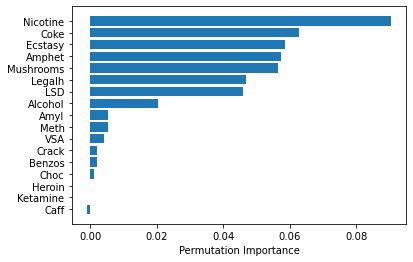

In [103]:
drugsC = pd.read_csv('SVMdrugs.csv')
y = drugsC['Cannabis']
X = drugsC.drop(target_label, 1)
y = np.where((y == 'CL0'), 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

svc =  SVC(kernel='rbf')
svc.fit(X_train, y_train)

perm_importance = permutation_importance(svc, X_test, y_test)

drug_labels = ['Alcohol','Amphet','Amyl','Benzos','Caff','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','VSA']
features = np.array(drug_labels)

sorted_idx = perm_importance.importances_mean.argsort()
print(perm_importance.importances_mean[sorted_idx])
print(sorted_idx)
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")